In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy


In [2]:
df=pd.read_csv('trend_telefon.csv',index_col=0)

In [3]:
df["pil gücü"] = df["pil gücü"].str.extract("(\d+)")

In [4]:
df["Ram"] = df["Ram"].str.extract("(\d+)")

In [5]:
df["Dahili hafıza"] = df["Dahili hafıza"].str.extract("(\d+)")

In [6]:
df["ön kamera sayısı"] = df["ön kamera sayısı"].str.extract("(\d+)")

In [7]:
df["arka kamera sayisi"] = df["arka kamera sayisi"].str.extract("(\d+)")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   marka                         1235 non-null   object 
 1   fiyat                         1195 non-null   float64
 2   kamera çözünürlük             1275 non-null   int64  
 3   Dahili hafıza                 1260 non-null   object 
 4   Ram                           1270 non-null   object 
 5   ekran boyutu                  1275 non-null   int64  
 6   pil gücü                      1275 non-null   object 
 7   mobil bağlantı hızı           1275 non-null   float64
 8   model                         455 non-null    object 
 9   ön kamera sayısı              1259 non-null   object 
 10  on kamera cozunurluk araligi  1259 non-null   float64
 11  arka kamera sayisi            1262 non-null   object 
 12  ekran boyutu aralığı          1275 non-null   int64  
 13  işl

In [9]:
df['Dahili hafıza'] = df['Dahili hafıza'].astype(float)

In [10]:
df['Ram'] = df['Ram'].astype(float)

In [11]:
df['pil gücü'] = df['pil gücü'].astype(float)

In [12]:
df['ön kamera sayısı'] = df['ön kamera sayısı'].astype(float)

In [13]:
df['arka kamera sayisi'] = df['arka kamera sayisi'].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   marka                         1235 non-null   object 
 1   fiyat                         1195 non-null   float64
 2   kamera çözünürlük             1275 non-null   int64  
 3   Dahili hafıza                 1260 non-null   float64
 4   Ram                           1270 non-null   float64
 5   ekran boyutu                  1275 non-null   int64  
 6   pil gücü                      1275 non-null   float64
 7   mobil bağlantı hızı           1275 non-null   float64
 8   model                         455 non-null    object 
 9   ön kamera sayısı              1259 non-null   float64
 10  on kamera cozunurluk araligi  1259 non-null   float64
 11  arka kamera sayisi            1262 non-null   float64
 12  ekran boyutu aralığı          1275 non-null   int64  
 13  işl

In [15]:
df.isnull().sum()

marka                            40
fiyat                            80
kamera çözünürlük                 0
Dahili hafıza                    15
Ram                               5
ekran boyutu                      0
pil gücü                          0
mobil bağlantı hızı               0
model                           820
ön kamera sayısı                 16
on kamera cozunurluk araligi     16
arka kamera sayisi               13
ekran boyutu aralığı              0
işletim sistemi                   0
çift hat                          0
garanti süresi                    0
şarj girişi                       0
ana kamera çözünürlük            16
nfc                               0
kulaklık girişi                   0
batarya                           0
renk                              0
dtype: int64

In [16]:
df.isnull().sum()

marka                            40
fiyat                            80
kamera çözünürlük                 0
Dahili hafıza                    15
Ram                               5
ekran boyutu                      0
pil gücü                          0
mobil bağlantı hızı               0
model                           820
ön kamera sayısı                 16
on kamera cozunurluk araligi     16
arka kamera sayisi               13
ekran boyutu aralığı              0
işletim sistemi                   0
çift hat                          0
garanti süresi                    0
şarj girişi                       0
ana kamera çözünürlük            16
nfc                               0
kulaklık girişi                   0
batarya                           0
renk                              0
dtype: int64

In [17]:
## model kolonu çok fazla nan değer içreiyor ve model isimlerinin fiyat etkisi değil daha çok özelliklerin etkisi
##olduğu için model kolonunu sildim
df.drop(["model"],axis=1,inplace=True)  

In [18]:
df.isnull().sum()

marka                           40
fiyat                           80
kamera çözünürlük                0
Dahili hafıza                   15
Ram                              5
ekran boyutu                     0
pil gücü                         0
mobil bağlantı hızı              0
ön kamera sayısı                16
on kamera cozunurluk araligi    16
arka kamera sayisi              13
ekran boyutu aralığı             0
işletim sistemi                  0
çift hat                         0
garanti süresi                   0
şarj girişi                      0
ana kamera çözünürlük           16
nfc                              0
kulaklık girişi                  0
batarya                          0
renk                             0
dtype: int64

In [19]:
## boş değer sayımız veri toplamına bakıldığında görece az oldugu için tüm boş değerleri siliyorum
## modeli ayrıca kolon olarak sildim çünkü burada silseydim 800 küsür veri götürecekti tek başına
df.dropna(inplace=True)

In [20]:
df

,marka,fiyat,kamera çözünürlük,Dahili hafıza,Ram,ekran boyutu,pil gücü,mobil bağlantı hızı,ön kamera sayısı,on kamera cozunurluk araligi,...,ekran boyutu aralığı,işletim sistemi,çift hat,garanti süresi,şarj girişi,ana kamera çözünürlük,nfc,kulaklık girişi,batarya,renk
0,Reeder,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,3500,Siyah
1,Apple,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,...,6,iOS,Yok,2,Lightning,10.0,Var,Lightning,3000,Beyaz
2,Xiaomi,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Mavi
3,Reeder,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,3500,Yeşil
4,Xiaomi,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Gri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,INFINIX,3995.0,5,64.0,4.0,4,1500.0,3.0,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,USB Type-C,1000,Siyah
1270,TCL,5799.0,5,64.0,4.0,4,1500.0,4.5,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,4500,Çok Renkli
1272,INFINIX,6088.0,13,64.0,4.0,6,5000.0,4.0,1.0,5.0,...,6,Android,Yok,2,Micro-USB,5.0,Var,3.5 mm,5000,Çok Renkli
1273,Samsung,6749.0,15,128.0,4.0,7,4000.0,4.5,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,4500,Mavi


In [21]:
df.isnull().sum() # artık içinde boş değer olmayan bir veri setimiz var. satır saymız 1143

marka                           0
fiyat                           0
kamera çözünürlük               0
Dahili hafıza                   0
Ram                             0
ekran boyutu                    0
pil gücü                        0
mobil bağlantı hızı             0
ön kamera sayısı                0
on kamera cozunurluk araligi    0
arka kamera sayisi              0
ekran boyutu aralığı            0
işletim sistemi                 0
çift hat                        0
garanti süresi                  0
şarj girişi                     0
ana kamera çözünürlük           0
nfc                             0
kulaklık girişi                 0
batarya                         0
renk                            0
dtype: int64

In [22]:
df.rename(columns=({'kamera çözünürlük':'kamera_cözünürlük','Dahili hafıza':'dahili_hafiza','ekran boyutu':'ekran_boyutu',
                    'pil gücü':'pil_gucu','mobil bağlantı hızı':'mobil_hizi','ön kamera sayısı':'on_kam_sayisi',
                    'on kamera cozunurluk araligi':'on_kam_coz','arka kamera sayisi':'arka_kam_sayisi',
                    'ekran boyutu aralığı':'ekran_aralık','işletim sistemi':'isletim_sitemi',
                    'çift hat':'cift_hat','garanti süresi':'garanti','şarj girişi':'sarj',
                    'ana kamera çözünürlük':'ana_kam_coz','kulaklık girişi':'kulaklık'
                }),
          inplace=True,
                    
)

In [23]:
df.head()

,marka,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,...,ekran_aralık,isletim_sitemi,cift_hat,garanti,sarj,ana_kam_coz,nfc,kulaklık,batarya,renk
0,Reeder,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,3500,Siyah
1,Apple,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,...,6,iOS,Yok,2,Lightning,10.0,Var,Lightning,3000,Beyaz
2,Xiaomi,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Mavi
3,Reeder,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,...,6,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,3500,Yeşil
4,Xiaomi,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Gri


In [24]:
df.columns

Index(['marka', 'fiyat', 'kamera_cözünürlük', 'dahili_hafiza', 'Ram',
       'ekran_boyutu', 'pil_gucu', 'mobil_hizi', 'on_kam_sayisi', 'on_kam_coz',
       'arka_kam_sayisi', 'ekran_aralık', 'isletim_sitemi', 'cift_hat',
       'garanti', 'sarj', 'ana_kam_coz', 'nfc', 'kulaklık', 'batarya', 'renk'],
      dtype='object')

In [25]:
smaller_df = df.loc[:,['fiyat', 'kamera_cözünürlük', 'dahili_hafiza', 
                      'Ram', 'ekran_boyutu', 'pil_gucu', 
                      'mobil_hizi', 'on_kam_sayisi', 'on_kam_coz', 
                       'arka_kam_sayisi','ekran_aralık','garanti' ,'ana_kam_coz','batarya']]

In [26]:
smaller_df

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,ekran_aralık,garanti,ana_kam_coz,batarya
0,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,3.0,6,2,5.0,3500
1,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,2.0,6,2,10.0,3000
2,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,6,2,15.0,5000
3,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,3.0,6,2,5.0,3500
4,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,6,2,15.0,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3995.0,5,64.0,4.0,4,1500.0,3.0,1.0,5.0,1.0,6,2,5.0,1000
1270,5799.0,5,64.0,4.0,4,1500.0,4.5,1.0,5.0,3.0,6,2,5.0,4500
1272,6088.0,13,64.0,4.0,6,5000.0,4.0,1.0,5.0,3.0,6,2,5.0,5000
1273,6749.0,15,128.0,4.0,7,4000.0,4.5,1.0,5.0,3.0,6,2,5.0,4500


In [27]:
len(smaller_df.columns)

14

In [28]:
smaller_df.isnull().sum()

fiyat                0
kamera_cözünürlük    0
dahili_hafiza        0
Ram                  0
ekran_boyutu         0
pil_gucu             0
mobil_hizi           0
on_kam_sayisi        0
on_kam_coz           0
arka_kam_sayisi      0
ekran_aralık         0
garanti              0
ana_kam_coz          0
batarya              0
dtype: int64

In [29]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fiyat              1143 non-null   float64
 1   kamera_cözünürlük  1143 non-null   int64  
 2   dahili_hafiza      1143 non-null   float64
 3   Ram                1143 non-null   float64
 4   ekran_boyutu       1143 non-null   int64  
 5   pil_gucu           1143 non-null   float64
 6   mobil_hizi         1143 non-null   float64
 7   on_kam_sayisi      1143 non-null   float64
 8   on_kam_coz         1143 non-null   float64
 9   arka_kam_sayisi    1143 non-null   float64
 10  ekran_aralık       1143 non-null   int64  
 11  garanti            1143 non-null   int64  
 12  ana_kam_coz        1143 non-null   float64
 13  batarya            1143 non-null   int64  
dtypes: float64(9), int64(5)
memory usage: 133.9 KB


In [30]:
smaller_df.describe()

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,ekran_aralık,garanti,ana_kam_coz,batarya
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0,1143.000000,1143.000000
mean,15974.522310,14.693788,149.825022,7.141732,5.308836,3105.731409,4.567804,1.077865,11.386702,2.594926,5.988626,2.0,11.386702,4320.297463
std,17455.649986,15.971429,108.221343,18.302073,1.011311,1593.161266,0.325500,0.620766,11.183358,0.983867,0.413066,0.0,11.183358,871.553306
min,1295.000000,5.000000,1.000000,1.000000,4.000000,900.000000,3.000000,1.000000,5.000000,1.000000,4.000000,2.0,5.000000,800.000000
25%,5199.000000,5.000000,64.000000,4.000000,4.000000,1500.000000,4.500000,1.000000,5.000000,2.000000,6.000000,2.0,5.000000,4000.000000
50%,7999.000000,10.000000,128.000000,6.000000,6.000000,3000.000000,4.500000,1.000000,10.000000,3.000000,6.000000,2.0,10.000000,4500.000000
75%,17874.500000,20.000000,128.000000,8.000000,6.000000,4000.000000,5.000000,1.000000,15.000000,3.000000,6.000000,2.0,15.000000,5000.000000
max,87407.000000,108.000000,512.000000,256.000000,14.000000,20000.000000,5.000000,10.000000,120.000000,5.000000,7.000000,2.0,120.000000,8000.000000


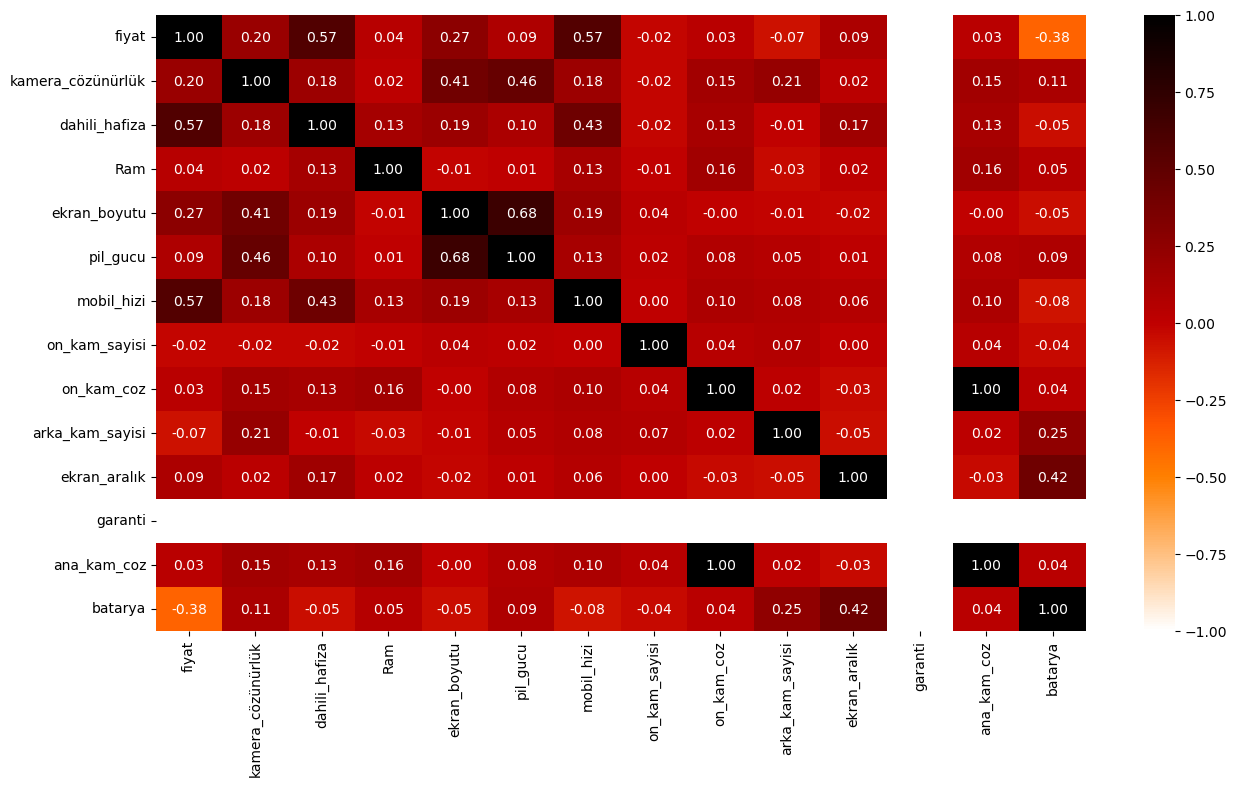

In [31]:
plt.figure(figsize=[15,8])
sns.heatmap(smaller_df.corr(), cmap="gist_heat_r", annot=True, vmin=-1, vmax=1, fmt='.2f');

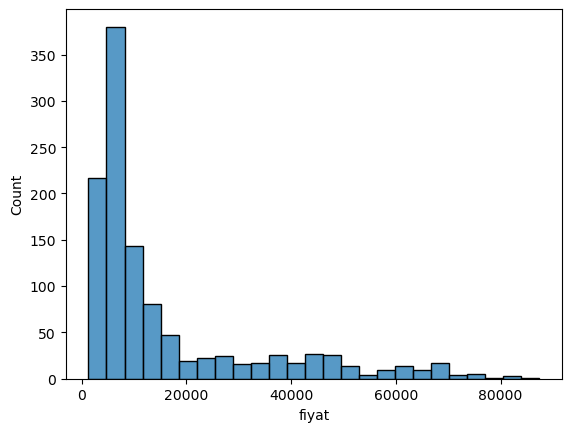

In [32]:
sns.histplot(smaller_df.fiyat, bins=25);

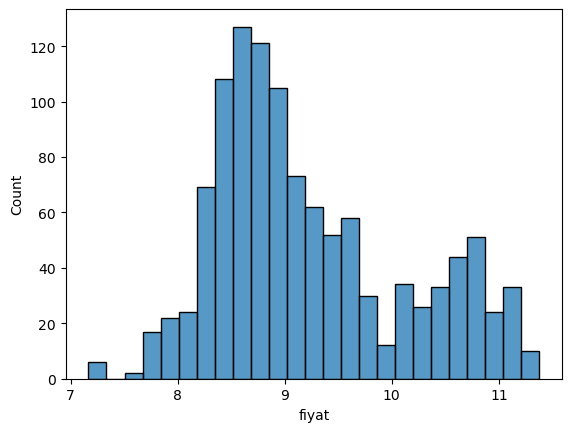

In [33]:
sns.histplot(np.log(smaller_df.fiyat), bins=25);

In [34]:
smaller_df['Logfiyat'] = np.log(smaller_df.fiyat)
smaller_df

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,ekran_aralık,garanti,ana_kam_coz,batarya,Logfiyat
0,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,3.0,6,2,5.0,3500,7.900637
1,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,2.0,6,2,10.0,3000,10.106388
2,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,6,2,15.0,5000,9.437396
3,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,3.0,6,2,5.0,3500,7.881937
4,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,6,2,15.0,5000,9.414831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3995.0,5,64.0,4.0,4,1500.0,3.0,1.0,5.0,1.0,6,2,5.0,1000,8.292799
1270,5799.0,5,64.0,4.0,4,1500.0,4.5,1.0,5.0,3.0,6,2,5.0,4500,8.665441
1272,6088.0,13,64.0,4.0,6,5000.0,4.0,1.0,5.0,3.0,6,2,5.0,5000,8.714075
1273,6749.0,15,128.0,4.0,7,4000.0,4.5,1.0,5.0,3.0,6,2,5.0,4500,8.817150


In [35]:
smaller_df["garanti"].unique()  ## tüm garanti süreleri 2 yıl ise bunu modele eklemenin mantığı yok

array([2], dtype=int64)

In [36]:
smaller_df["garanti"].unique()

array([2], dtype=int64)

In [37]:
#lineer reg

In [38]:
X = smaller_df.loc[:,['kamera_cözünürlük', 'dahili_hafiza', 'Ram', 
                      'ekran_boyutu', 'pil_gucu', 'mobil_hizi', 
                      'on_kam_sayisi', 'on_kam_coz', 'arka_kam_sayisi',
                      'ekran_aralık', 'ana_kam_coz','batarya']]

y = smaller_df['Logfiyat']

In [39]:
def split_and_test(X, y):
    '''
    Bu uygulamada sadece Lineer Regresyon algoritmasıyla
    çalışacağımız için Validation aşamasına ihtiyacımız yok
    '''
    
    # Veri Setini Train/Test Olarak Bölme
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Eğitim Veri Setiyle Lineer Regresyon Modeli Oluşturma
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # Test Veri Setiyle Model Skorunu Elde Etme
    test_score = lr_model.score(X_test, y_test)
    
    # Sonuçları Görüntüleme
    print('Test R2 Score:', round(test_score,3))

In [40]:
split_and_test(X, y)

Test R2 Score: 0.566


In [41]:
#stats model

In [42]:
# Modeli Oluşturma
lm1 = smf.ols('Logfiyat ~ kamera_cözünürlük + dahili_hafiza + Ram + ekran_boyutu + pil_gucu + mobil_hizi + on_kam_sayisi+on_kam_coz+arka_kam_sayisi+ ekran_aralık+ana_kam_coz+batarya', 
              data=smaller_df)

# Modeli Eğitme
fit1 = lm1.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Logfiyat   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sat, 19 Aug 2023   Prob (F-statistic):          9.16e-244
Time:                        20:22:19   Log-Likelihood:                -914.67
No. Observations:                1143   AIC:                             1853.
Df Residuals:                    1131   BIC:                             1914.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2927      0.354      6.486      0.000       1.599       2.986
kamera_cözünürlük     0.0063      0.001      5.276      0.000       0.004       0.009
dahili_hafiza         0.0031      0.000     17.872      0.000       0.003       0.003
Ram                   0.0003      0.001      0.284      0.777      -0.002       0.002
ekran_boyutu          0.1369      0.023      6.018      0.000       0.092       0.181
pil_gucu          -6.345e-05   1.46e-05     -4.358      0.000    -9.2e-05   -3.49e-05
mobil_hizi            1.0268      0.056     18.416      0.000       0.917       1.136
on_kam_sayisi        -0.0503      0.026     -1.931      0.054      -0.101       0.001
on_kam_coz            0.0027      0.001      3.598      0.000       0.001       0.004
arka_kam_sayisi      -0.0328      0.018     -1.853      0.064      -0.068       0.002
ekran_aralık          0.4425      0.045      9.858      0.000       0.354       0.531
ana_kam_coz           0.0027      0.001      3.598      0.000       0.001       0.004
batarya              -0.0003    2.2e-05    -14.828      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       43.927   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.311
Skew:                           0.279   Prob(JB):                     3.64e-18
Kurtosis:                       4.173   Cond. No.                     2.05e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
### dummy

In [44]:
# markalar için getdummy 

In [45]:
df["marka"].value_counts()

Samsung           260
Xiaomi            201
Apple             149
INFINIX            75
Tecno              71
Reeder             55
realme             52
omix               48
General Mobile     41
POCO               40
vivo               33
Oppo               22
Casper             21
Trident            16
TCL                15
Hiking             11
oukitel            10
Alcatel             6
PREMIER             3
ZTE                 2
Cat                 2
NOTHING             2
Dijitsu             2
Honor               2
Huawei              2
Motorola            1
ULEFONE             1
Name: marka, dtype: int64

In [46]:
markalar = pd.get_dummies(df.marka, drop_first=True)
markalar

,Apple,Casper,Cat,Dijitsu,General Mobile,Hiking,Honor,Huawei,INFINIX,Motorola,...,TCL,Tecno,Trident,ULEFONE,Xiaomi,ZTE,omix,oukitel,realme,vivo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1270,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1272,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Oluşturduğumuz markalar değişkeniyle dataframemizi birleştirelim
smaller_df2 = smaller_df.join(markalar)

In [48]:
smaller_df2.head()

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,...,TCL,Tecno,Trident,ULEFONE,Xiaomi,ZTE,omix,oukitel,realme,vivo
0,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,0,0,1,0,0,0,0,0
3,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
smaller_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fiyat              1143 non-null   float64
 1   kamera_cözünürlük  1143 non-null   int64  
 2   dahili_hafiza      1143 non-null   float64
 3   Ram                1143 non-null   float64
 4   ekran_boyutu       1143 non-null   int64  
 5   pil_gucu           1143 non-null   float64
 6   mobil_hizi         1143 non-null   float64
 7   on_kam_sayisi      1143 non-null   float64
 8   on_kam_coz         1143 non-null   float64
 9   arka_kam_sayisi    1143 non-null   float64
 10  ekran_aralık       1143 non-null   int64  
 11  garanti            1143 non-null   int64  
 12  ana_kam_coz        1143 non-null   float64
 13  batarya            1143 non-null   int64  
 14  Logfiyat           1143 non-null   float64
 15  Apple              1143 non-null   uint8  
 16  Casper             1143 

In [50]:
Y = smaller_df2.Logfiyat
x= smaller_df2.drop(columns=['fiyat','Logfiyat','ana_kam_coz'])
x = sm.add_constant(x)

lsm = sm.OLS(Y,x)
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Logfiyat   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:22:19   Log-Likelihood:                -463.12
No. Observations:                1143   AIC:                             1002.
Df Residuals:                    1105   BIC:                             1194.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
kamera_cözünürlük     0.0026      0.001      3.058      0.002       0.001       0.004
dahili_hafiza         0.0024      0.000     20.124      0.000       0.002       0.003
Ram                   0.0016      0.001      2.561      0.011       0.000       0.003
ekran_boyutu          0.0142      0.016      0.864      0.388      -0.018       0.047
pil_gucu          -4.214e-06   1.03e-05     -0.408      0.683   -2.45e-05     1.6e-05
mobil_hizi            0.4818      0.044     10.960      0.000       0.396       0.568
on_kam_sayisi        -0.0473      0.018     -2.613      0.009      -0.083      -0.012
on_kam_coz            0.0072      0.001      6.721      0.000       0.005       0.009
arka_kam_sayisi       0.0145      0.013      1.122      0.262      -0.011       0.040
ekran_aralık          0.3108      0.033      9.342      0.000       0.246       0.376
garanti               1.8411      0.147     12.498      0.000       1.552       2.130
batarya              -0.0001   2.09e-05     -6.780      0.000      -0.000      -0.000
Apple                 2.6092      0.163     16.026      0.000       2.290       2.929
Casper                1.1939      0.189      6.327      0.000       0.824       1.564
Cat                   2.8539      0.308      9.269      0.000       2.250       3.458
Dijitsu               0.5821      0.312      1.864      0.063      -0.031       1.195
General Mobile        1.2527      0.179      7.011      0.000       0.902       1.603
Hiking                1.0237      0.200      5.107      0.000       0.630       1.417
Honor                 1.2856      0.317      4.049      0.000       0.663       1.909
Huawei                2.0460      0.311      6.588      0.000       1.437       2.655
INFINIX               1.2088      0.176      6.879      0.000       0.864       1.554
Motorola              2.9612      0.409      7.246      0.000       2.159       3.763
NOTHING               2.0137      0.312      6.453      0.000       1.401       2.626
Oppo                  1.4690      0.186      7.907      0.000       1.104       1.834
POCO                  1.5364      0.179      8.607      0.000       1.186       1.887
PREMIER               1.2306      0.262      4.698      0.000       0.717       1.745
Reeder                0.5849      0.171      3.426      0.001       0.250       0.920
Samsung               1.7454      0.169     10.343      0.000       1.414       2.076
TCL                   1.0825      0.187      5.796      0.000       0.716       1.449
Tecno                 1.2481      0.173      7.195      0.000       0.908       1.588
Trident               1.0284      0.190      5.410      0.000       0.655       1.401
ULEFONE               2.9127      0.426      6.830      0.000       2.076       3.749
Xiaomi                1.4795      0.171      8.658      0.000       1.144

In [51]:
### lineer ile test edelim

In [52]:
X2 = smaller_df2.drop(columns=['fiyat','Logfiyat'])

y2 = smaller_df2['Logfiyat']

In [53]:
def split_and_test(X2, y2):
    '''
    Bu uygulamada sadece Lineer Regresyon algoritmasıyla
    çalışacağımız için Validation aşamasına ihtiyacımız yok
    '''
    
    # Veri Setini Train/Test Olarak Bölme
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
    
    # Eğitim Veri Setiyle Lineer Regresyon Modeli Oluşturma
    lr_model2 = LinearRegression()
    lr_model2.fit(X2_train, y2_train)
    
    # Test Veri Setiyle Model Skorunu Elde Etme
    test_score2 = lr_model2.score(X2_test, y2_test)
    
    # Sonuçları Görüntüleme
    print('Test R2 Score2:', round(test_score2,3))

In [54]:
split_and_test(X2, y2)

Test R2 Score2: 0.792


In [55]:
# İŞLETİM SİSTEMİ için getdummy 

In [56]:
df['isletim_sitemi'].value_counts()

Android    992
iOS        150
Windows      1
Name: isletim_sitemi, dtype: int64

In [57]:
sistemler=pd.get_dummies(df['isletim_sitemi'],drop_first=True)
sistemler

,Windows,iOS
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
1265,0,0
1270,0,0
1272,0,0
1273,0,0


In [58]:
smaller_df3 = smaller_df2.join(sistemler)

In [59]:
smaller_df3.head()

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,...,Trident,ULEFONE,Xiaomi,ZTE,omix,oukitel,realme,vivo,Windows,iOS
0,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
1,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,1,0,0,0,0,0,0,0
3,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
4,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
smaller_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fiyat              1143 non-null   float64
 1   kamera_cözünürlük  1143 non-null   int64  
 2   dahili_hafiza      1143 non-null   float64
 3   Ram                1143 non-null   float64
 4   ekran_boyutu       1143 non-null   int64  
 5   pil_gucu           1143 non-null   float64
 6   mobil_hizi         1143 non-null   float64
 7   on_kam_sayisi      1143 non-null   float64
 8   on_kam_coz         1143 non-null   float64
 9   arka_kam_sayisi    1143 non-null   float64
 10  ekran_aralık       1143 non-null   int64  
 11  garanti            1143 non-null   int64  
 12  ana_kam_coz        1143 non-null   float64
 13  batarya            1143 non-null   int64  
 14  Logfiyat           1143 non-null   float64
 15  Apple              1143 non-null   uint8  
 16  Casper             1143 

In [61]:
## işletim sistemleri işin içine girince az da olsa başarı arttı
## hem Rscore değeri hem de ADJ R score değeri arttı

In [62]:
Y3 = smaller_df3.Logfiyat
x3= smaller_df3.drop(columns=['fiyat','Logfiyat','ana_kam_coz'])
x3= sm.add_constant(x3)

lsm3 = sm.OLS(Y3,x3)
fit3 = lsm3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Logfiyat   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:22:19   Log-Likelihood:                -459.24
No. Observations:                1143   AIC:                             998.5
Df Residuals:                    1103   BIC:                             1200.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
kamera_cözünürlük     0.0025      0.001      3.004      0.003       0.001       0.004
dahili_hafiza         0.0024      0.000     20.191      0.000       0.002       0.003
Ram                   0.0016      0.001      2.583      0.010       0.000       0.003
ekran_boyutu          0.0147      0.016      0.895      0.371      -0.018       0.047
pil_gucu          -4.821e-06   1.03e-05     -0.468      0.640    -2.5e-05    1.54e-05
mobil_hizi            0.4736      0.044     10.743      0.000       0.387       0.560
on_kam_sayisi        -0.0523      0.018     -2.878      0.004      -0.088      -0.017
on_kam_coz            0.0072      0.001      6.779      0.000       0.005       0.009
arka_kam_sayisi       0.0136      0.013      1.059      0.290      -0.012       0.039
ekran_aralık          0.3116      0.033      9.388      0.000       0.246       0.377
garanti               1.8547      0.147     12.599      0.000       1.566       2.143
batarya              -0.0001   2.12e-05     -6.206      0.000      -0.000      -9e-05
Apple                 2.8446      0.405      7.025      0.000       2.050       3.639
Casper                1.1570      0.189      6.130      0.000       0.787       1.527
Cat                   2.8231      0.307      9.186      0.000       2.220       3.426
Dijitsu               0.5484      0.312      1.759      0.079      -0.063       1.160
General Mobile        1.2158      0.179      6.800      0.000       0.865       1.567
Hiking                0.9921      0.200      4.953      0.000       0.599       1.385
Honor                 1.2475      0.317      3.935      0.000       0.626       1.869
Huawei                2.0116      0.310      6.488      0.000       1.403       2.620
INFINIX               1.1710      0.176      6.659      0.000       0.826       1.516
Motorola              2.9185      0.408      7.154      0.000       2.118       3.719
NOTHING               1.9802      0.312      6.356      0.000       1.369       2.591
Oppo                  1.4329      0.186      7.711      0.000       1.068       1.797
POCO                  1.5012      0.179      8.408      0.000       1.151       1.852
PREMIER               1.2210      0.261      4.672      0.000       0.708       1.734
Reeder                0.5566      0.171      3.261      0.001       0.222       0.891
Samsung               1.7133      0.169     10.153      0.000       1.382       2.044
TCL                   1.0540      0.187      5.648      0.000       0.688       1.420
Tecno                 1.2152      0.174      6.999      0.000       0.875       1.556
Trident               0.9955      0.190      5.238      0.000       0.623       1.368
ULEFONE               2.8606      0.426      6.717      0.000       2.025       3.696
Xiaomi                1.4441      0.171      8.446      0.000       1.109

In [63]:
###

In [64]:
df["renk"].value_counts()

Siyah         266
Mavi          242
Beyaz         144
Yeşil         114
Gri           110
Mor            50
Çok Renkli     49
Altın          42
Gümüş          30
Kırmızı        21
Pembe          17
Sarı           14
Turuncu        11
Lacivert        9
Metalik         8
Bej             4
Krem            4
Bordo           4
Turkuaz         4
Name: renk, dtype: int64

In [65]:
renkler=pd.get_dummies(df.renk,drop_first=True)

In [66]:
renkler.head()

,Bej,Beyaz,Bordo,Gri,Gümüş,Krem,Kırmızı,Lacivert,Mavi,Metalik,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil,Çok Renkli
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
smaller_df4=smaller_df3.join(renkler)

In [68]:
smaller_df4.head()

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,...,Mavi,Metalik,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil,Çok Renkli
0,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,3.0,...,0,0,0,0,0,1,0,0,0,0
1,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,1,0,0,0,0,0,0,0,0,0
3,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,3.0,...,0,0,0,0,0,0,0,0,1,0
4,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
Y4 = smaller_df4.Logfiyat
x4= smaller_df4.drop(columns=['fiyat','Logfiyat','ana_kam_coz'])
x4= sm.add_constant(x4)

lsm4 = sm.OLS(Y4,x4)
fit4 = lsm4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Logfiyat   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:22:19   Log-Likelihood:                -428.20
No. Observations:                1143   AIC:                             972.4
Df Residuals:                    1085   BIC:                             1265.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
kamera_cözünürlük     0.0024      0.001      2.917      0.004       0.001       0.004
dahili_hafiza         0.0023      0.000     19.054      0.000       0.002       0.003
Ram                   0.0017      0.001      2.815      0.005       0.001       0.003
ekran_boyutu          0.0126      0.016      0.771      0.441      -0.019       0.045
pil_gucu          -6.071e-06   1.02e-05     -0.594      0.552   -2.61e-05     1.4e-05
mobil_hizi            0.4606      0.044     10.506      0.000       0.375       0.547
on_kam_sayisi        -0.0529      0.018     -2.961      0.003      -0.088      -0.018
on_kam_coz            0.0074      0.001      7.023      0.000       0.005       0.009
arka_kam_sayisi       0.0107      0.013      0.842      0.400      -0.014       0.036
ekran_aralık          0.3017      0.033      9.182      0.000       0.237       0.366
garanti               1.9425      0.148     13.089      0.000       1.651       2.234
batarya              -0.0001   2.11e-05     -5.890      0.000      -0.000    -8.3e-05
Apple                 2.9178      0.401      7.282      0.000       2.132       3.704
Casper                1.1424      0.186      6.129      0.000       0.777       1.508
Cat                   2.8139      0.302      9.312      0.000       2.221       3.407
Dijitsu               0.5018      0.307      1.634      0.103      -0.101       1.104
General Mobile        1.1934      0.176      6.766      0.000       0.847       1.539
Hiking                0.9830      0.197      4.989      0.000       0.596       1.370
Honor                 1.1974      0.314      3.818      0.000       0.582       1.813
Huawei                2.0189      0.305      6.623      0.000       1.421       2.617
INFINIX               1.1599      0.173      6.689      0.000       0.820       1.500
Motorola              2.8939      0.401      7.216      0.000       2.107       3.681
NOTHING               2.0157      0.306      6.581      0.000       1.415       2.617
Oppo                  1.4171      0.183      7.746      0.000       1.058       1.776
POCO                  1.5381      0.176      8.724      0.000       1.192       1.884
PREMIER               1.1517      0.258      4.471      0.000       0.646       1.657
Reeder                0.5520      0.168      3.276      0.001       0.221       0.883
Samsung               1.6912      0.167     10.149      0.000       1.364       2.018
TCL                   1.0031      0.184      5.445      0.000       0.642       1.365
Tecno                 1.1963      0.172      6.974      0.000       0.860       1.533
Trident               0.9915      0.187      5.307      0.000       0.625       1.358
ULEFONE               2.8702      0.419      6.846      0.000       2.048       3.693
Xiaomi                1.4271      0.169      8.446      0.000       1.096

In [70]:
df.info() ## object özelliklerimizi hatırlamak amacı ile çalıştırdım

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marka              1143 non-null   object 
 1   fiyat              1143 non-null   float64
 2   kamera_cözünürlük  1143 non-null   int64  
 3   dahili_hafiza      1143 non-null   float64
 4   Ram                1143 non-null   float64
 5   ekran_boyutu       1143 non-null   int64  
 6   pil_gucu           1143 non-null   float64
 7   mobil_hizi         1143 non-null   float64
 8   on_kam_sayisi      1143 non-null   float64
 9   on_kam_coz         1143 non-null   float64
 10  arka_kam_sayisi    1143 non-null   float64
 11  ekran_aralık       1143 non-null   int64  
 12  isletim_sitemi     1143 non-null   object 
 13  cift_hat           1143 non-null   object 
 14  garanti            1143 non-null   int64  
 15  sarj               1143 non-null   object 
 16  ana_kam_coz        1143 

In [71]:
#nfc özelliğinin mevcut olması bir üstünlük sağlayabilir,var yok şeiklinde oldugu için ilişki durumunu ele alalım
# label encoding de yapalım
df["nfc"].value_counts()  

Var    587
Yok    556
Name: nfc, dtype: int64

In [72]:
df[df["nfc"]=="Var"]

,marka,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,...,ekran_aralık,isletim_sitemi,cift_hat,garanti,sarj,ana_kam_coz,nfc,kulaklık,batarya,renk
1,Apple,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,...,6,iOS,Yok,2,Lightning,10.0,Var,Lightning,3000,Beyaz
2,Xiaomi,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Mavi
4,Xiaomi,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Gri
5,Xiaomi,8849.0,20,128.0,6.0,6,5000.0,5.0,1.0,10.0,...,6,Android,Var,2,USB Type-C,10.0,Var,USB Type-C,5000,Siyah
6,Samsung,8280.0,20,128.0,6.0,6,4000.0,4.5,1.0,15.0,...,6,Android,Var,2,USB Type-C,15.0,Var,3.5 mm,4500,Mavi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,realme,5749.0,5,128.0,4.0,4,1500.0,4.5,1.0,20.0,...,6,Android,Var,2,USB Type-C,20.0,Var,3.5 mm,5000,Mavi
1248,realme,5749.0,5,128.0,4.0,4,1500.0,4.5,1.0,20.0,...,6,Android,Var,2,USB Type-C,20.0,Var,3.5 mm,5000,Mavi
1256,Tecno,4220.0,5,64.0,4.0,4,1500.0,4.5,1.0,5.0,...,6,Android,Var,2,Micro-USB,5.0,Var,3.5 mm,5000,Çok Renkli
1262,INFINIX,6088.0,13,64.0,4.0,6,5000.0,4.0,1.0,5.0,...,6,Android,Yok,2,Micro-USB,5.0,Var,3.5 mm,5000,Çok Renkli


In [73]:
def NFC(n):
    if n=="Var":
        return 1
    else:
        return 0

In [74]:
df['nfc2']=df['nfc'].apply(NFC) 

In [75]:
df.head()

,marka,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,...,isletim_sitemi,cift_hat,garanti,sarj,ana_kam_coz,nfc,kulaklık,batarya,renk,nfc2
0,Reeder,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,...,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,3500,Siyah,0
1,Apple,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,...,iOS,Yok,2,Lightning,10.0,Var,Lightning,3000,Beyaz,1
2,Xiaomi,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Mavi,1
3,Reeder,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,...,Android,Var,2,USB Type-C,5.0,Yok,3.5 mm,3500,Yeşil,0
4,Xiaomi,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,...,Android,Var,2,USB Type-C,15.0,Var,USB Type-C,5000,Gri,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marka              1143 non-null   object 
 1   fiyat              1143 non-null   float64
 2   kamera_cözünürlük  1143 non-null   int64  
 3   dahili_hafiza      1143 non-null   float64
 4   Ram                1143 non-null   float64
 5   ekran_boyutu       1143 non-null   int64  
 6   pil_gucu           1143 non-null   float64
 7   mobil_hizi         1143 non-null   float64
 8   on_kam_sayisi      1143 non-null   float64
 9   on_kam_coz         1143 non-null   float64
 10  arka_kam_sayisi    1143 non-null   float64
 11  ekran_aralık       1143 non-null   int64  
 12  isletim_sitemi     1143 non-null   object 
 13  cift_hat           1143 non-null   object 
 14  garanti            1143 non-null   int64  
 15  sarj               1143 non-null   object 
 16  ana_kam_coz        1143 

In [77]:
## yukarıda nfc nin var ve yok olan değerlerini nfc2 adında yeni bir değişkene 1 ve sıfır olarak verdik

In [78]:
df_nfc=df[["nfc2"]]

In [79]:
df_nfc

,nfc2
0,0
1,1
2,1
3,0
4,1
...,...
1265,0
1270,0
1272,1
1273,0


In [80]:
smaller_df5 = smaller_df4.join(df_nfc)

In [81]:
smaller_df5.head()

,fiyat,kamera_cözünürlük,dahili_hafiza,Ram,ekran_boyutu,pil_gucu,mobil_hizi,on_kam_sayisi,on_kam_coz,arka_kam_sayisi,...,Metalik,Mor,Pembe,Sarı,Siyah,Turkuaz,Turuncu,Yeşil,Çok Renkli,nfc2
0,2699.0,5,128.0,2.0,4,1500.0,4.0,1.0,5.0,3.0,...,0,0,0,0,1,0,0,0,0,0
1,24499.0,12,128.0,4.0,6,3110.0,4.5,1.0,10.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,12549.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,0,0,0,0,0,0,0,1
3,2649.0,15,128.0,4.0,6,3000.0,4.5,1.0,5.0,3.0,...,0,0,0,0,0,0,0,1,0,0
4,12269.0,108,256.0,8.0,6,5000.0,4.5,1.0,15.0,4.0,...,0,0,0,0,0,0,0,0,0,1


In [82]:
smaller_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 62 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fiyat              1143 non-null   float64
 1   kamera_cözünürlük  1143 non-null   int64  
 2   dahili_hafiza      1143 non-null   float64
 3   Ram                1143 non-null   float64
 4   ekran_boyutu       1143 non-null   int64  
 5   pil_gucu           1143 non-null   float64
 6   mobil_hizi         1143 non-null   float64
 7   on_kam_sayisi      1143 non-null   float64
 8   on_kam_coz         1143 non-null   float64
 9   arka_kam_sayisi    1143 non-null   float64
 10  ekran_aralık       1143 non-null   int64  
 11  garanti            1143 non-null   int64  
 12  ana_kam_coz        1143 non-null   float64
 13  batarya            1143 non-null   int64  
 14  Logfiyat           1143 non-null   float64
 15  Apple              1143 non-null   uint8  
 16  Casper             1143 

In [83]:
Y5 = smaller_df5.Logfiyat
x5= smaller_df5.drop(columns=['fiyat','Logfiyat','ana_kam_coz'])
x5= sm.add_constant(x5)

lsm5 = sm.OLS(Y5,x5)
fit5 = lsm5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Logfiyat   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:22:20   Log-Likelihood:                -373.38
No. Observations:                1143   AIC:                             864.8
Df Residuals:                    1084   BIC:                             1162.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
kamera_cözünürlük     0.0013      0.001      1.554      0.120      -0.000       0.003
dahili_hafiza         0.0021      0.000     17.921      0.000       0.002       0.002
Ram                   0.0012      0.001      2.037      0.042    4.44e-05       0.002
ekran_boyutu          0.0374      0.016      2.374      0.018       0.006       0.068
pil_gucu          -1.456e-05   9.77e-06     -1.490      0.136   -3.37e-05    4.61e-06
mobil_hizi            0.4142      0.042      9.853      0.000       0.332       0.497
on_kam_sayisi        -0.0509      0.017     -2.986      0.003      -0.084      -0.017
on_kam_coz            0.0045      0.001      4.284      0.000       0.002       0.007
arka_kam_sayisi      -0.0026      0.012     -0.217      0.829      -0.027       0.021
ekran_aralık          0.2674      0.032      8.485      0.000       0.206       0.329
garanti               2.0976      0.142     14.741      0.000       1.818       2.377
batarya              -0.0001   2.02e-05     -5.365      0.000      -0.000   -6.88e-05
Apple                 2.8056      0.382      7.340      0.000       2.056       3.556
Casper                1.1154      0.178      6.275      0.000       0.767       1.464
Cat                   2.5513      0.289      8.820      0.000       1.984       3.119
Dijitsu               0.5478      0.293      1.870      0.062      -0.027       1.123
General Mobile        1.2029      0.168      7.152      0.000       0.873       1.533
Hiking                0.8906      0.188      4.735      0.000       0.522       1.260
Honor                 1.1140      0.299      3.723      0.000       0.527       1.701
Huawei                1.9455      0.291      6.690      0.000       1.375       2.516
INFINIX               1.1036      0.165      6.670      0.000       0.779       1.428
Motorola              2.5996      0.383      6.779      0.000       1.847       3.352
NOTHING               1.8322      0.293      6.261      0.000       1.258       2.406
Oppo                  1.3590      0.175      7.786      0.000       1.017       1.701
POCO                  1.4250      0.168      8.458      0.000       1.094       1.756
PREMIER               1.1452      0.246      4.663      0.000       0.663       1.627
Reeder                0.5890      0.161      3.665      0.000       0.274       0.904
Samsung               1.5615      0.159      9.796      0.000       1.249       1.874
TCL                   0.9637      0.176      5.485      0.000       0.619       1.308
Tecno                 1.1085      0.164      6.768      0.000       0.787       1.430
Trident               1.0146      0.178      5.694      0.000       0.665       1.364
ULEFONE               2.7500      0.400      6.876      0.000       1.965       3.535
Xiaomi                1.3757      0.161      8.534      0.000       1.059

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marka              1143 non-null   object 
 1   fiyat              1143 non-null   float64
 2   kamera_cözünürlük  1143 non-null   int64  
 3   dahili_hafiza      1143 non-null   float64
 4   Ram                1143 non-null   float64
 5   ekran_boyutu       1143 non-null   int64  
 6   pil_gucu           1143 non-null   float64
 7   mobil_hizi         1143 non-null   float64
 8   on_kam_sayisi      1143 non-null   float64
 9   on_kam_coz         1143 non-null   float64
 10  arka_kam_sayisi    1143 non-null   float64
 11  ekran_aralık       1143 non-null   int64  
 12  isletim_sitemi     1143 non-null   object 
 13  cift_hat           1143 non-null   object 
 14  garanti            1143 non-null   int64  
 15  sarj               1143 non-null   object 
 16  ana_kam_coz        1143 

In [85]:
## cift hat var, yok içinde label encooding denedim
## R score 0.01 arttı ancak ADJ R score sabit kaldı, bu nedenle modele eklemeye gerek duymadım
df["cift_hat"].value_counts() 

Var    937
Yok    206
Name: cift_hat, dtype: int64

In [86]:
## eklemeler yapılabılır, örneğin henüz cross validaiton yapmadım